<h1>1. Data Acquisition</h1>
<ul><h3> Bibliotecas </h3>

In [332]:
# importação das bibliotecas necessárias
import pandas as pd

import numpy as np

# %matplotlib inline #porque usar esse comando?
from matplotlib import pyplot as pyp


import seaborn as sns
# %matplotlib inline #porque usar esse comando?

from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

<ul><h3> Conjunto de dados </h3>

In [93]:
# leitura do arquivo em csv
df = pd.read_csv("imports-85.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<ul><h3> Adicionar cabeçalho </h3>
<p>
O pandas define, automaticamente, o cabeçalho como número inteiro a partir de 0.
</p>
<p>
Para um melhor entendimento sobre os dados que estamos manipulando, podemos adicionar um cabeçalho. Os rótulos (nomes) de cada coluna estão disponíveis em: <a href="https://archive.ics.uci.edu/ml/datasets/Automobile" target="_blank"> https: // archive.ics.uci.edu/ml/datasets/Automobile </a>
</p>
<p>
Portanto, temos que adicionar cabeçalho manualmente.
</p>
<p>
Primeiro, criamos uma lista "headers" que inclui todos os nomes das colunas em ordem.
Em seguida, usamos <code> dataframe.columns = headers </code> para substituir os cabeçalhos pela lista que criamos.
</p>
</ul>

In [94]:
# atribuir todos os nomes de colunas na lista "headers"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [95]:
 # substituir o cabeçalho numérico pelo novo atribuído a "headers"
df.columns = headers
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?



<ul><h3> Informações básicas </h3>
<p>
Depois de obter e ler os dados, é hora de explorar o datasets. <br>
Existem várias maneiras de acessar as informações essenciais para nos ajudar a entender melhor o nosso conjunto de dados.
</p>

<ul><h4> Tipos de dados com dtype: </h4></ul>

In [96]:
# retorna uma série com o tipo de dado de cado coluna
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<ul><ul><h4>Resumo estatístico com describe:</h4>
Para obter um resumo estatístico de todas as colunas de tipo numérico (int, float) como contagem, valor médio da coluna, desvio padrão da coluna, etc. Utilizamos o método describe.

Importante lembrar que ele exclui os valores <code> NaN </code> (Not a Number).</ul>

In [97]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


<ul><ul><p>
Se também quisermos verificar todas as colunas, incluindo aquelas que são do tipo object, é necessário adicionar um argumento <code> include = "all" </code> dentro do colchete. Vamos executar novamente:
</p></ul>

In [98]:
# aplica o método describe em todas as colunas 
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


<ul><p>
Agora, o método describe() forneceu o resumo estatístico de todas as colunas, incluindo atributos não numéricos, digitados como object. <br>
Agora podemos ver os valores para unique, top e freq das colunas onde o tipo de dados é object. <br>
Alguns valores na tabela acima são exibidos como "NaN", porque esses números não estão disponíveis em relação a um tipo de coluna específico. <br>
</p></ul>
<ul><p>
<h4>Visualização com info:</h4>
Aqui podemos visualizar o nosso dataset com as 30 linhas superiores e as 30 linhas inferiores.
E também mostra que o df tem 205 linhas e 26 colunas no total.</ul>

In [99]:
# look at the info of "df"
df.info

<bound method DataFrame.info of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd      

<h1>2. Data Cleansing</h1>
<p>
A limpeza de dados é o processo de preparação de dados para análise, removendo ou modificando dados incorretos, incompletos, irrelevantes, duplicados ou incorretamente formatados. Como foi visto, anteriormente, nas informações básicas do dataset, existem vários pontos de interrogação "?" entre os valores, os quais são valores ausentes que podem atrapalhar nossa a análise.
<div> Então, como identificamos todos esses valores ausentes e como lidamos com eles? </div>


<ul><h3> Como trabalhar com dados ausentes? </h3>
<ul>
    <li> Identificação de dados ausentes</li>
    <li> Manipulação de dados ausentes</li>
    <li> Visualização da correção </li>
</ul>
<h3> Identificação de dados ausentes</h3>
<ul><h4> 1. Conversão de "?" para NaN </h4>
Nesse df que estamos trabalhando, os campos com dados ausentes estão preenchidos com um ponto de interrogação "?".
Então, vamos substituir o "?" por NaN (Not a Number), que é o marcador de valor ausente padrão do Python, por razões de velocidade e conveniência computacional. Aqui usamos a função:
 <pre>.replace(A, B, inplace = True) </pre>
Para substituir A por B usando o Numpy.</ul>

In [100]:
# conferir situação atual
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [101]:
# substituir A por B usando a biblioteca Numpy
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<ul><ul><h4>2. Avaliação de dados ausentes </h4>

Os valores ausentes foram convertidos para o padrão do Python. Usamos as funções internas do Python para identificar esses valores ausentes. Existem dois métodos para detectar dados ausentes:
<ol>
    <li><b>.isnull()</b> </li>
    <li><b>.notnull()</b> </li>
</ol>
A saída é um valor booleano indicando se o valor que é passado para o argumento está de fato faltando dados.
"True" significa valor ausente, enquanto "False" significa valor ausente.</ul>

In [102]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<ul><ul><h4>3. Contar valores ausentes em cada coluna </h4>
<p>
Usando um loop for no Python, descobrimos a quantidade de valores ausentes em cada coluna. Como mencionado acima, "True" representa um valor ausente, "False" significa que o valor está presente no conjunto de dados. No corpo do loop for, o método ".value_counts ()" conta o número de valores "True".
</p></ul>

In [103]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

<ul>Com base no resumo acima, cada coluna possui 205 linhas de dados, 7 colunas contendo dados ausentes:
<ol>
    <li>"normalized-losses": 41 dados ausentes</li>
    <li>"num-of-doors": 2 dados ausentes</li>
    <li>"bore": 4 dados ausentes</li>
    <li>"stroke" : 4 dados ausentes</li>
    <li>"horsepower": 2 dados ausentes</li>
    <li>"peak-rpm": 2 dados ausentes</li>
    <li>"price": 4 dados ausentes</li>
</ol></ul>

<ul><h3> Manipulação de dados ausentes</h3>

<ol>
     <li><b>Substituir dados<br></b>
        a. substituir pela média<br>
        b. substituir pela frequência<br>
        c. substituição com base em outras funções
    </li>
    <li><b>Descartar dados<br></b>
        a. descartar a linha inteira<br>
        b. descartar a coluna inteira
    </li>
   
</ol>
<ul>Obs.: Colunas inteiras devem ser descartadas apenas se a maioria das entradas na coluna estiver vazia. Aqui, no nosso conjunto de dados, nenhuma das colunas está vazia o suficiente para descartarmos completamente.
Temos alguma liberdade para escolher qual método substituir os dados; no entanto, alguns métodos podem parecer mais razoáveis que outros. Aplicaremos cada método a muitas colunas diferentes:</ul>
<ul>
<b>Substituir pela média:</b>
<ul>
    <li>"normalized-losses": 41 dados ausentes, substituir por "mean"</li>
    <li>"stroke": 4 dados ausentes, substituir por "mean"</li>
    <li>"bore": 4 dados ausentes, substituir por "mean"</li>
    <li>"horsepower": 2 dados ausentes, substituir por "mean"</li>
    <li>"peak-rpm": 2 dados ausentes, substituir por "mean"</li>
</ul>

<b>Substituir pela frequência:</b>
<ul>
    <li>"num-of-doors": 2 dados ausentes,  substituir por "four". 
        <ul>
            <li>Motivo: 84% dos carros sedãs são de 4 portas. Sendo assim, como 4 portas são mais frequentes, é mais provável que ocorra.</li>
        </ul>
    </li>
</ul>

<b>Descartar a linha inteira:</b>
<ul>
    <li>"price": 4 dados ausentes, simplesmente deletar a linha toda.
        <ul>
            <li>Motivo: "price" é o que queremos prever. Qualquer entrada de dados sem dados de preços não pode ser usada para previsão; portanto, qualquer linha agora sem dados de preço não é útil para nós.</li>
        </ul>
    </li>
</ul>

Procedimentos de <b>substituição pela média</b>:

In [104]:
# Calcular a média da coluna "normalized-losses":
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [105]:
# Substituir "NaN" pelo valor médio na coluna "normalized-losses":
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [106]:
# Calcular a média da coluna 'bore':
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810957


In [107]:
#  Substituir "NaN" pelo valor médio na coluna 'bore':
df["bore"].replace(np.nan, avg_bore, inplace=True)

In [108]:
# Calcular a média da coluna 'stroke':
avg_stroke=df['stroke'].astype('float').mean(axis=0)
print("Average of stroke:", avg_stroke)

Average of stroke: 3.2554228855721337


In [109]:
# Substituir "NaN" pelo valor médio na coluna 'stroke':
df["stroke"].replace(np.nan, avg_bore, inplace=True)

In [110]:
# Calcular a média da coluna 'horsepower'
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


In [111]:
# Substituir "NaN" pelo valor médio na coluna 'horsepower'
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [112]:
# Calcular a média da coluna'peak-rpm'
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


In [113]:
# Substituir "NaN" pelo valor médio na coluna 'peak-rpm'
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

<ul><ul>
    <li>Para ver quais valores estão presentes em uma coluna específica, podemos usar o método "<b>.value_counts()</b>":</ul>
    </li>

In [114]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

<ul><ul>
    <li>Conforme o resultado acima, quatro portas são o tipo mais comum. Também podemos usar o método "<b>.idxmax()</b>" para calcular automaticamente qual é o tipo mais frequente:</ul>
    </li>

In [115]:
df['num-of-doors'].value_counts().idxmax()

'four'

<ul><ul><li>O procedimento de <b>substituição por frequência</b> é muito semelhante ao que vimos anteriormente:

In [116]:
# substituir os valores ausentes de 'num-of-doors' pelos valores mais frequentes
df["num-of-doors"].replace(np.nan, "four", inplace=True)

<ul><ul><li>Por fim, vamos <b>descartar linhas</b> que não têm dados de preços:

In [117]:
# descartar toda linha com NaN na coluna "price"
df.dropna(subset=["price"], axis=0, inplace=True)

# redefinir o índice, porque eliminamos duas linhas
df.reset_index(drop=True, inplace=True)

In [118]:
# Visualizar o resultado:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<ul><ul><h3> Visualização da correção</h3>

<ul><p>O último passo na limpeza de dados é verificar e garantir que todos os dados estejam no formato correto (int, float, texto ou outro).</p>

No Pandas, usamos: 
<p><b>.dtype()</b> para verificar o tipo de dados</p>
<p><b>.astype()</b> ara alterar o tipo de dados</p></ul>


In [119]:
# listar os tipos de dados para cada coluna
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<ul><ul>
    <li>Como podemos ver acima, algumas colunas não são do tipo de dados correto. Variáveis ​​numéricas devem ter o tipo 'float' ou 'int', e variáveis com caracteres (como categorias, por exemplo) devem ter o tipo 'object'.</li>
    <li>As variáveis ​​'bore' e 'stroke' são valores numéricos que descrevem os motores; portanto, devemos esperar que sejam do tipo 'float' ou 'int'; no entanto, eles são mostrados como o tipo 'object'. Temos que converter os tipos de dados em um formato adequado para cada coluna usando o método "<b>astype()</b>".

In [120]:
# Converter tipos de dados para o formato apropriado
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [121]:
# conferir o resultado
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<ul><ul>
    <li>Agora, finalmente o conjunto de dados está limpo, sem valores ausentes e com todos os dados em seu formato apropriado.</ul></ul></li>
<p>
<h1>3. Data Standardization</h1>
<p>
Os dados, geralmente, são coletados de diferentes fontes e possuem diferentes formatos.
Dado esse cenário, a padronização é o processo de transformar dados em um formato comum que permite ao analista fazer uma comparação significativa.
</p>
<ul><p>
<h3> Conversão de unidade de medida</h3>
<p>Transformar mpg para L/100km:</p>
<p>No nosso conjunto de dados, as colunas de consumo de combustível "city-mpg" e "highway-mpg" são representadas pela unidade mpg: miles per gallon (milhas por galão), o que não facilita a nossa análise devido a diferença de unidade de medida utilizada. Vamos generalizar para L/100km.</p>
<p>
Assim, precisamos aplicar a <b> transformação de dados </b> para transformar mpg em L/100km.</p>

<p> A fórmula para a conversão de unidades é <p>
L / 100km = 235 / mpg

In [122]:
# Criar coluna city-L/100km e atribuir a conversão usando as operações matemáticas
df['city-L/100km'] = 235/df['city-mpg']

In [123]:
# Descartar coluna city-mpg df.drop(['city-mpg'], axis=1)
df.drop(['city-mpg'], axis=1, inplace=True)

In [124]:
# transformar mpg em L / 100km por operação matemática (235 dividido por mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

In [125]:
# renomeie o nome da coluna de "highway-mpg" para "highway-L / 100km"
df.rename(columns={"highway-mpg":"highway-L/100km"}, inplace=True)

In [126]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'highway-L/100km',
       'price', 'city-L/100km'],
      dtype='object')

In [127]:
# verificar dados transformados  
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,10.681818,17450.0,13.055556


<h1>4. Data Normalization</h1>
<p> Normalização é o processo de transformar valores de várias variáveis ​​em um intervalo semelhante. As normalizações típicas incluem escalar a variável para que a média da variável seja 0, escalar a variável para que a variação seja 1 ou escalar variável para que os valores da variável variem de 0 a 1.
<p>
<ul><ul>
    <li><b>Objetivo:</b> colocar os valores das variáveis "length", "width" e "height" numa escala de 0 a 1.
<li><b>Abordagem:</b> substituir os valores originais por (valor original)/(valor máximo)

In [128]:
# substituir o (valor original) por (valor original) / (valor máximo)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 

In [129]:
# mostrar as colunas normalizadas com escala no intervalo de [0,1].
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


<h2>5. Analise dos recursos e gráficos</h2>
<p>
<ul><ul> Ao visualizar variáveis ​​individuais, é importante primeiro entender com que tipo de variável você está lidando. Isso nos ajudará a encontrar o método de visualização correto para essa variável. 

In [144]:
# novamente, utilizamos o dtypes
print(df.dtypes)

symboling               int64
normalized-losses       int32
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
highway-L/100km       float64
price                 float64
city-L/100km          float64
horsepower-binned    category
diesel                  uint8
gas                     uint8
aspiration-std          uint8
aspiration-turbo        uint8
dtype: object


In [145]:
#podemos calcular a correlação entre variáveis do tipo "int64" ou "float64" usando o método "corr":
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-L/100km,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.000059,-0.182196,0.075810,0.279740,-0.029807,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.059131,-0.114713,0.217300,0.239543,0.181189,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.155225,0.250313,0.371178,-0.360305,0.577576,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.121904,0.159733,0.579795,-0.285970,0.707108,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188301,0.189867,0.615056,-0.245800,0.736728,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.068633,0.259737,-0.087001,-0.309974,0.084301,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.166038,0.156433,0.757981,-0.279361,0.836921,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.199668,0.028889,0.822668,-0.256733,0.783465,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055377,0.001263,0.566903,-0.267392,0.559112,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.000059,0.059131,0.155225,0.121904,0.188301,-0.068633,0.166038,0.199668,-0.055377,1.000000,0.186877,0.098844,-0.054852,0.052612,0.082116,0.043711,0.239379,-0.239379,-0.215929,0.215929


In [146]:
# Encontrar a correlação entre as seguintes colunas 
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()  

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055377,0.001263,0.566903
stroke,-0.055377,1.000000,0.186877,0.098844
compression-ratio,0.001263,0.186877,1.000000,-0.214489
horsepower,0.566903,0.098844,-0.214489,1.000000


<ul><ul><h3>Variáveis numéricas contínuas:</h3> 

<ul><p>Variáveis numéricas contínuas são variáveis ​​que podem conter qualquer valor dentro de algum intervalo. Variáveis numéricas contínuas podem ter o tipo "int64" ou "float64". Uma ótima maneira de visualizar essas variáveis é usar <b>gráficos de dispersão</b> com linhas ajustadas.</p>

<p>Para começar a entender a relação (linear) entre uma variável individual e o preço, podemos usar "<b>regplot</b>" da biblioteca Seaborn, que plota o gráfico de dispersão com linha de regressão ajustada para os dados.</p>
<p>Vamos ver vários exemplos de diferentes relações lineares:</ul>
<p>
 <h4>Relação linear forte</h4> 

(0, 56145.010257047936)

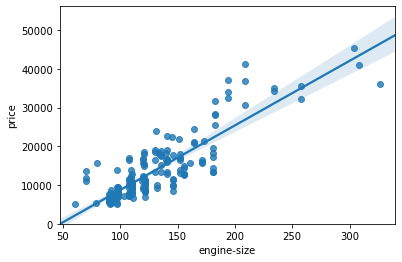

In [147]:
# Engine-size como variável preditora potencial de price
sns.regplot(x="engine-size", y="price", data=df)
pyp.ylim(0,)

<ul><ul>
    <li>À medida que o engine-size aumenta, o price aumenta: isso indica uma <b>correlação direta positiva</b> entre essas duas variáveis. O <b>engine-size parece ser um bom preditor de price</b>, já que a linha de regressão é quase uma linha diagonal perfeita.</p>


In [148]:
# Verificando a correlação entre 'engine-size' e 'price', se confirma como engine-size como bom preditor
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


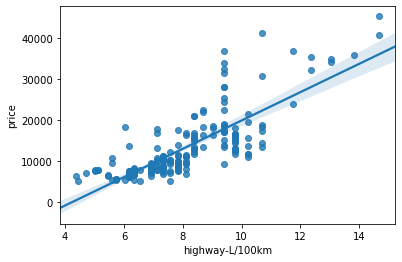

In [149]:
# highway-L/100km como variável preditora potencial de price
sns.regplot(x="highway-L/100km", y="price", data=df)

In [150]:
# Verificando a correlação entre "highway-L/100km" e "price"
df[['highway-L/100km', 'price']].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


<ul><ul>
    <li><p>À medida que o "highway-L/100km" sobe, o "price" também sobe: isso indica mais uma <b>correlação direta positiva</b>. "highway-L/100km" <b>pode ser um bom preditor de preço</b>.</p>
        <h4>
Relação linear fraca:</h4>


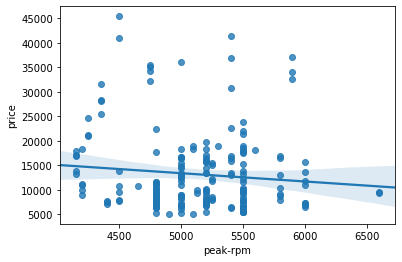

In [151]:
# peak-rpm como variável preditora potencial de price
sns.regplot(x="peak-rpm", y="price", data=df)

<ul><ul>
    <li><p>Peak rpm <b>não é um bom preditor do preço</b>, uma vez que a linha de regressão está próxima da horizontal. Além disso, os pontos de dados são muito dispersos e distantes da linha ajustada, mostrando muita variabilidade. Portanto, não é uma variável confiável.</p>

In [152]:
# Verificando a correlação entre 'peak-rpm' e 'price'
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [153]:
# Verificando a correlação entre 'stroke' e 'price'
df[["stroke","price"]].corr() 

,stroke,price
stroke,1.000000,0.082116
price,0.082116,1.000000


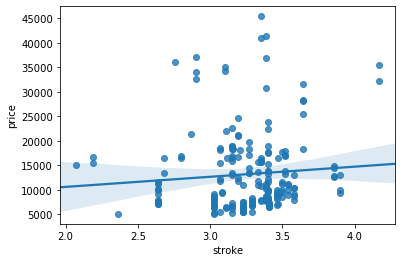

In [154]:
# stroke como variável preditora potencial de price
sns.regplot(x="stroke", y="price", data=df)

<ul><ul><h3>Variaveis categóricas</h3>

<ul><p><p>Essas são variáveis que descrevem uma característica de uma unidade de dados e são selecionadas em um pequeno grupo de categorias. As variáveis categóricas podem ter o tipo "object" ou "int64". Uma boa maneira de visualizar variáveis categóricas é usando boxplots. </p>


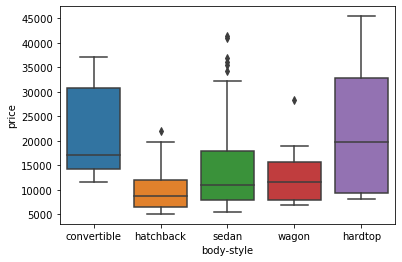

In [155]:
# Vejamos a relação entre "body-style" e "price"
sns.boxplot(x="body-style", y="price", data=df)


<ul><ul>
    <li>Vemos que as distribuições de price entre as diferentes categorias de body-style têm uma sobreposição significativa e, portanto, o <b>body-style não seria um bom preditor de preço</b>. Vamos examinar o mecanismo "engine-location" e "price":

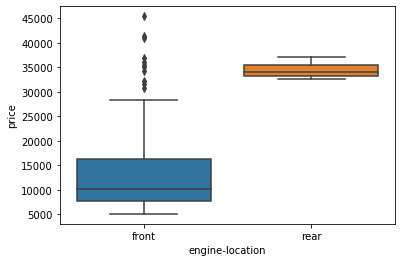

In [156]:
# Vejamos a relação entre "engine-location" e "price"
sns.boxplot(x="engine-location", y="price", data=df)

<ul><ul>
    <li><p> Aqui vemos que a distribuição do price entre essas duas categorias de engine-location, front e rear, é distinta o suficiente para dizer que a <b>engine-location é um bom preditor potencial</b> de price. </p>

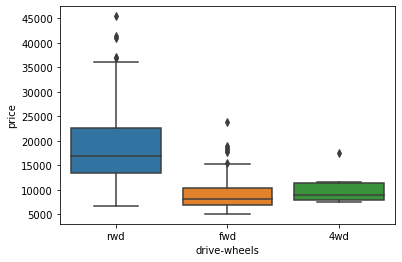

In [157]:
# Vejamos a relação entre "drive-wheels" e "price" 
sns.boxplot(x="drive-wheels", y="price", data=df)

<ul><ul>
    <li>Aqui vemos que a distribuição do price entre as diferentes categorias de drive-wheels difere, então, <b>drive-wheels pode ser um bom preditor de price.</b> 
        <h3>Análise estatística descritiva</h3>
<p>Vamos primeiro verificar as variáveis utilizando um método de descrição.</p>
<ul>
    <li>
<p>A função <b>describe</b> calcula automaticamente estatísticas básicas para todas as variáveis contínuas, mas é possível incluir parâmetro na função para obter informações específicas de variáveis categóricas. Quaisquer valores de NaN são automaticamente ignorados.</p>

In [158]:
#Verificando as variáveis contínuas
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-L/100km,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.258353,10.164279,103.402985,5117.665368,8.044957,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316212,4.004965,37.365650,478.113805,1.840739,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.351852,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,6.911765,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,7.833333,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,9.400000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,14.687500,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


In [159]:
#Verificando as variáveis categóricas específicamente
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


<ul><ul><h3>Contagens de valores</h3>
<p>O método value_counts é uma boa maneira de entender quantas unidades de cada característica temos. Funciona apenas com Pandas series, não com Pandas Dataframes. 

In [160]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [161]:
#Formata o visual da Serie em tabela
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [162]:
# Vamos repetir as etapas acima, mas salvar os resultados no dataframe "drive_wheels_counts" 
# e renomear a coluna 'drive-wheels' para 'value_counts'
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [163]:
# Agora vamos renomear o índice para 'drive-wheels'
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [164]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


<ul><ul>
    <li>Conforme a contagem, <b>engine location não seria uma boa preditora para o preço</b>. Isso ocorre porque só temos 3 carros com motor traseiro e 198 com motor à frente; esse resultado é distorcido. Portanto, não podemos tirar conclusões sobre a engine location.
        <h3>Noções básicas de agrupamento</h3>
<p> O método "groupby" agrupa dados por diferentes categorias. Os dados são agrupados com base em uma ou várias variáveis ​​e a análise é realizada nos grupos individuais. </p>

In [165]:
# agrupar pela variável "drive-wheels" que tem 3 categorias diferentes como vemos:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<ul><ul>
    <li> Para saber, em média, qual tipo de drive-wheels tem o maior valor, podemos agrupar a variável e calcular sua média.


In [166]:
# Selecionar 'drive-wheels', 'body-style' e 'price', depois atribua-o a variável "df_group_one"
df_group_one = df[['drive-wheels','body-style','price']]

In [167]:
# calcule o preço médio para cada uma das diferentes categorias de dados
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<ul><ul><li> <p> A partir de nossos dados, parece que os veículos com tração traseira (rear-wheel) são, em média, os mais caros, enquanto 4-wheel e front-wheel têm aproximadamente o mesmo preço. </p>

<p>Você também pode agrupar com várias variáveis. Por exemplo, vamos agrupar por 'drive-wheels' e 'body-style'. Isso agrupa o quadro de dados pelas combinações exclusivas 'drive-wheels' e'body-style'. Podemos armazenar os resultados na variável 'grouped_test1'.</p>

In [168]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [169]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<ul><ul><li>
<p> Esses dados agrupados são muito mais fáceis de visualizar quando são transformados em uma <b>tabela dinâmica</b>. Uma tabela dinâmica é como uma planilha do Excel, com uma variável na coluna e outra na linha. Podemos converter o quadro de dados em uma tabela dinâmica usando o <b>método pivot</b> para criar uma tabela dinâmica a partir dos grupos. </p>

<p>Nesse caso, deixaremos a variável drive-wheels como as linhas da tabela e giraremos o body-style para se tornar as colunas da tabela: 

In [170]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<ul><ul><li>Frequentemente, não teremos dados para alguns campos pivotados. Podemos preencher esses campos ausentes com o valor 0, mas qualquer outro valor também pode ser usado.

In [171]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [172]:
# Aplicar o "groupby" para encontrar o "price" médio para cada carro, baseado em "body-style"
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


<ul><ul><h4>Variaveis: Drive Wheels e Body Style VS Price</h4>
    <ul><li><p> O mapa de calor representa a variável de destino (price) proporcional à cor em relação às variáveis 'drive-wheel' e 'body-style' nos eixos vertical e horizontal, respectivamente. Isso nos permite visualizar como o preço está relacionado ao 'drive-wheel' e ao 'body-style'. </p>

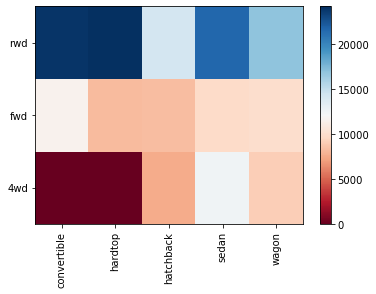

In [174]:
#Vamos usar um mapa de calor para visualizar a relação entre Body Style VS Price 
fig, ax = pyp.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
pyp.xticks(rotation=90)

fig.colorbar(im)
pyp.show()

<ul><ul><ui><li>A principal questão que tentamos responder até aqui é "Quais são as principais características que têm maior impacto no preço do carro?"

<li>Para obter uma melhor medida das características importantes, examinamos a correlação dessas variáveis ​​com o preço do carro, ou seja: como o preço do carro depende dessa variável??
    <h3>Correlação e Causalidade</h3>
    <ul>
    <li><p><b>Correlação</b>: uma medida da extensão da interdependência entre variáveis.
<li><b>Causalidade</b>: a relação entre causa e efeito entre duas variáveis.</p>
<p>Obs.: Correlação não implica causalidade. Determinar a correlação é muito mais simples do que a causa determinante, pois a causa pode exigir experimentação independente.</p>
<p><b> Correlação de Pearson</b ></p>
A correlação de Pearson mede a dependência linear entre duas variáveis ​​X e Y. </p>
O coeficiente resultante é um valor entre -1 e 1 inclusive, onde: </p>
<ul>
    <li> <b> 1 </b>: correlação linear positiva total. </li>
    <li> <b> 0 </b>: Sem correlação linear, as duas variáveis ​​provavelmente não se afetam. </li>
    <li> <b> -1 </b>: correlação linear negativa total. </li>
</ul>

In [175]:
#Correlação de Pearson é o método padrão da função "corr". 
#Como feito antes, podemos calcular a correlação de Pearson das variáveis 'int64' ou 'float64'
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-L/100km,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.000059,-0.182196,0.075810,0.279740,-0.029807,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.059131,-0.114713,0.217300,0.239543,0.181189,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.155225,0.250313,0.371178,-0.360305,0.577576,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.121904,0.159733,0.579795,-0.285970,0.707108,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188301,0.189867,0.615056,-0.245800,0.736728,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.068633,0.259737,-0.087001,-0.309974,0.084301,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.166038,0.156433,0.757981,-0.279361,0.836921,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.199668,0.028889,0.822668,-0.256733,0.783465,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055377,0.001263,0.566903,-0.267392,0.559112,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.000059,0.059131,0.155225,0.121904,0.188301,-0.068633,0.166038,0.199668,-0.055377,1.000000,0.186877,0.098844,-0.054852,0.052612,0.082116,0.043711,0.239379,-0.239379,-0.215929,0.215929


<ul><ul><h3>P-value</h3>: 
<p>O valor P é o valor de probabilidade de que a correlação entre duas variáveis é estatisticamente significativa. Normalmente, escolhemos um nível de significância de 0,05, o que significa que estamos 95% confiantes de que a correlação entre as variáveis ​​é significativa. </p>
Por convenção, quando o
<ul>
    <li> p-value é $ <$ 0.001: dizemos que há fortes evidências de que a correlação é significativa. </li>
    <li> o valor-p é $ <$ 0,05: há evidência moderada de que a correlação é significativa. </li>
    <li> o valor-p é $ <$ 0,1: há poucas evidências de que a correlação seja significativa. </li>
    <li> o valor-p é $> $ 0,1: não há evidências de que a correlação seja significativa. </li>
</ul>
Podemos obter essas informações usando o <b>módulo "stats" da biblioteca scipy</b>.
<h3>Wheel-base vs Price</h3>
Vamos calcular o coeficiente de correlação de Pearson e P-value de 'wheel-base' e 'price'

In [176]:
# Vamos calcular o coeficiente de correlação de Pearson e P-value de 'wheel-base' e 'price'
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("O coeficiente de correlação de Pearson é", pearson_coef, "com um P-value de P =", p_value)  

O coeficiente de correlação de Pearson é 0.584641822265508 com um P-value de P = 8.076488270733218e-20


<ul><ul>
<h5> Conclusão: </h5>
Como o valor-p é $ <$ 0,001, a correlação entre a  wheel-base e price é estatisticamente significativa, embora a relação linear não seja extremamente forte (~ 0,585) </p>
<h3>Horsepower vs Price</h3>

In [177]:
# Vamos calcular o coeficiente de correlação de Pearson e P-value de horsepower e price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("O coeficiente de correlação de Pearson é", pearson_coef, "com um P-value de P = ", p_value)  

O coeficiente de correlação de Pearson é 0.8096068016571054 com um P-value de P =  6.273536270650504e-48


<ul><ul><h5> Conclusão: </h5>

<p> Como o valor-p é $ <$ 0,001, a correlação entre horsepower e price é estatisticamente significativa e a relação linear é bastante forte (~ 0,809, próximo a 1) </p>
<h3>Length vs Price</h3>

In [178]:
# Vamos calcular o coeficiente de correlação de Pearson e P-value de length  e price
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("O coeficiente de correlação de Pearson é", pearson_coef, "com um P-value de P = ", p_value)  

O coeficiente de correlação de Pearson é 0.6906283804483639 com um P-value de P =  8.016477466159328e-30


<ul><ul><h5> Conclusão: </h5>
<p> Como o valor-p é $ <$ 0,001, a correlação entre length e price é estatisticamente significativa e a relação linear é moderadamente forte (~ 0,691). </p>
<h3>Width vs Price</h3>

In [179]:
# Vamos calcular o coeficiente de correlação de Pearson e P-value de width  e price
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("O coeficiente de correlação de Pearson é", pearson_coef, "com um P-value de P = ", p_value ) 

O coeficiente de correlação de Pearson é 0.7512653440522672 com um P-value de P =  9.20033551048217e-38



<ul><ul><h5> Conclusão: </h5>

Como o valor de p é <0,001, a correlação entre width e price é estatisticamente significativa e a relação linear é bastante forte (~ 0,751).
### Curb-weight vs Price

In [180]:
# Vamos calcular o coeficiente de correlação de Pearson e P-value de curb-weight e price
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("O coeficiente de correlação de Pearson é", pearson_coef, "com um P-value de P = ", p_value)  

O coeficiente de correlação de Pearson é 0.8344145257702843 com um P-value de P =  2.189577238894065e-53


<ul><ul><h5> Conclusão: </h5>
<p> Como o valor-p é $ <$ 0,001, a correlação entre o curb-weight e o price é estatisticamente significativa, e a relação linear é bastante forte (~ 0,834). </p>
<h3>Engine-size vs Price</h3>

In [297]:
# Vamos calcular o coeficiente de correlação de Pearson e P-value de engine-size e price
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("O coeficiente de correlação de Pearson é", pearson_coef, "com um P-value de P = ", p_value) 

O coeficiente de correlação de Pearson é 0.8723351674455182 com um P-value de P =  9.265491622200232e-64


<ul><ul><h5> Conclusão: </h5>

<p> Como o valor-p é $ <$ 0,001, a correlação entre engine-size e price é estatisticamente significativa e a relação linear é muito forte (~ 0,872). </p>
<h3>Bore vs Price</h3>

In [182]:
# Vamos calcular o coeficiente de correlação de Pearson e P-value de bore e price
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("O coeficiente de correlação de Pearson é", pearson_coef, "com um P-value de P = ", p_value ) 

O coeficiente de correlação de Pearson é 0.5431553832626603 com um P-value de P =  8.049189483935261e-17


<ul><ul><h5> Conclusão: </h5>
<p> Como o valor-p é $ <$ 0,001, a correlação entre bore e price é estatisticamente significativa, mas a relação linear é apenas moderada (~ 0,521). </p>
<h3>city-L/100km vs Price</h3>

In [183]:
# Vamos calcular o coeficiente de correlação de Pearson e P-value de city-L/100km e price
pearson_coef, p_value = stats.pearsonr(df['city-L/100km'], df['price'])
print("O coeficiente de correlação de Pearson é", pearson_coef, "com um P-value de P = ", p_value)  

O coeficiente de correlação de Pearson é 0.7898975136626943 com um P-value de P =  3.903106400939802e-44


<ul><ul><h5> Conclusão: </h5>
<p> Como o valor-p é $ <$ 0,001, a correlação entre city-L/100km e preço é estatisticamente significativa e o coeficiente de ~ -0,687 mostra que o relacionamento é negativo e moderadamente forte. </p>
<h3>highway-L/100km vs Price</h3>

In [184]:
# Vamos calcular o coeficiente de correlação de Pearson e P-value de highway-L/100km e price
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print( "O coeficiente de correlação de Pearson é", pearson_coef, "com um P-value de P = ", p_value ) 

O coeficiente de correlação de Pearson é 0.8011176263981973 com um P-value de P =  3.0467845810415427e-46


<ul><ul><h5> Conclusão: </h5>
Como o valor-p é <0,001, a correlação entre a highway-L/100km e o price é estatisticamente significativa, e o coeficiente de ~ -0,705 mostra que a relação é negativa e moderadamente forte.
<h3>Análise de variância - ANOVA</h3>
<ul><p> ANOVA é um método estatístico usado para testar se há diferenças significativas entre as médias de dois ou mais grupos. ANOVA retorna dois parâmetros: </p>

<p> <b> Pontuação no teste F </b>: a ANOVA assume que as médias de todos os grupos são iguais, calcula quanta as médias se desviam da suposição e a reporta como a pontuação do teste F. Uma pontuação maior significa que há uma diferença maior entre as médias. </p>

<p> <b> Valor P </b>: o valor P indica quão estatisticamente significativo é o nosso valor calculado de pontuação. </p>

<p> Se nossa variável de price estiver fortemente correlacionada com a variável que estamos analisando, se espera que a ANOVA retorne uma <b>pontuação considerável no teste F e um pequeno valor p</b>. </p></ul>
<h4>Drive Wheels</h4>
<p> Como o ANOVA analisa a diferença entre diferentes grupos da mesma variável, a função groupby será útil. Como o algoritmo ANOVA calcula a média dos dados automaticamente, não precisamos calcular a média antes. </p>



In [185]:
# Vamos ver se diferentes tipos de 'drive-wheels' afetam o 'price', agrupamos os dados
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [186]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [187]:
# Podemos obter os valores do grupo usando o método "get_group"
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [188]:
# podemos usar a função 'f_oneway' do módulo 'stats' para obter o F-test score e P-value: ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


<ul><ul><li>Esse é um ótimo resultado, com uma grande pontuação no teste F mostrando uma forte correlação e um valor de P quase 0. Mas isso significa que todos os três grupos testados estão altamente correlacionados?

In [189]:
# Separadamente: fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [190]:
# Separadamente: 4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [191]:
# Separadamente: 4wd and fwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


<ul><ul>
<h3> Conclusão: variáveis importantes </h3>
<p> Agora temos uma idéia melhor da aparência de nossos dados e de quais variáveis ​​são importantes a serem consideradas ao prever o preço do carro. Nós reduzimos para as seguintes variáveis: </p>

Variáveis numéricas contínuas:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>highway-L/100km</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Variáveis categóricas:
<ul>
    <li>Drive-wheels</li>
</ul>


<p> À medida que passamos a criar modelos de aprendizado de máquina para automatizar nossa análise, alimentar o modelo com variáveis ​​que afetam significativamente nossa variável de destino melhorará o desempenho da previsão do modelo. </p></ul></ul>

<h1>6. Desenvolvimento do Modelo</h1>
Aqui, será desenvolvido o modelo que preverá o preço do carro usando as variáveis. Esta <b>é apenas uma estimativa</b>, mas dará uma idéia objetiva de quanto o carro deve custar.

Algumas perguntas que queremos responder:
<ul>
    <li>O revendedor está oferecendo um valor justo pela minha troca?</li>
    <li>Coloquei um valor justo no meu carro?</li>

<h3>Regressão linear múltipla</h3>
<ul><p>Esse método é usado para explicar a relação entre uma variável de resposta contínua (dependente) e <b> 2 ou mais </b> variáveis ​​preditoras (independentes).
A maioria dos modelos de regressão do mundo real envolvem múltiplos preditores.<ul><p>
<p>    $$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$</p>
<p>$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$</p>
<p><b>A equação é dada por</b>
<p>$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$</p>
<p>
<ul>
    <li>a refere-se à <b> interceptação </b> da linha de regressão0, em outras palavras: o valor de Y quando X é 0</li>
    <li>b se refere à <b> inclinação </b> da linha de regressão, em outras palavras: o valor com o qual Y muda quando X aumenta em 1 unidade</li>
</ul>
    <p><p>Sabemos que outros bons preditores de preço podem ser:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>highway-L/100km</li>
</ul>
Vamos desenvolver um modelo usando essas variáveis ​​como variáveis ​​preditoras.

In [192]:
# Criar o objeto de regressão linear
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [208]:
#Criar novo df só com bons preditores
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]

In [210]:
Z.head()

,horsepower,curb-weight,engine-size,highway-L/100km
0,111,2548,130,8.703704
1,111,2548,130,8.703704
2,154,2823,152,9.038462
3,102,2337,109,7.833333
4,115,2824,136,10.681818


In [221]:
df['price'].head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [194]:
#Ajustar o modelo linear usando as quatro variáveis mencionadas acima
# lm.fit(x,y) onde x são as variáveis independentes(preditoras) e y é a variável dependente(resposta)
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<ul><ul><h4>Qual é o valor da interceptação (a)?</h4>
"a" refere-se à interceptação da linha de regressão0, em outras palavras: o valor de Y quando X é 0

In [195]:
# valor da interceptação (a)
lm.intercept_

-14385.634549360093

<ul><ul><h4>Qual é o valor da inclinação (b)?</h4>
"b" se refere à inclinação da linha de regressão, em outras palavras: o valor com o qual Y muda quando X aumenta em 1 unidade

In [196]:
# valores dos coeficientes (b1, b2, b3, b4)
lm.coef_

array([ 36.6377371 ,   3.50038215,  85.37370862, 500.51979785])

<ul><ul>Devemos obter uma função linear final com a estrutura:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

Obtemos uma função linear final com a estrutura
<p>
<b>Price</b> = -14385.634549360093 + 36.6377371 x <b>horsepower</b> + 3.50038215 x <b>curb-weight</b> + 85.37370862 x <b>engine-size</b> + 500.51979785 x <b>highway-L/100km</b>
    <h3> Avaliação de modelo usando visualização</h3>
    <p><h4>Gráfico de distribuição</h4>
    <p> Uma maneira de observar o ajuste de um modelo de regressão linear múltipla é observar o gráfico de distribuição: Podemos observar a distribuição dos valores ajustados que resultam do modelo e compará-lo com a distribuição dos valores reais. </b></p>

In [236]:
#Primeiro vamos fazer uma previsão de preço usando os 4 bons preditores selecionados acima
Ypred = lm.predict(Z)
Ypred.astype(int)

array([14055, 14055, 18638, 10758, 16670, 14735, 15915, 16300, 18610,
       10974, 10974, 17735, 17928, 19447, 26778, 27303, 28275,     8,
        5157,  5280,  5224,  5451,  9087,  5769,  5846,  5846,  9308,
       12048, 18985,  3768,  5715,  3787,  6503,  6559,  6748,  6797,
        9547,  9733,  9785, 10023, 11535, 10489, 10184, 12697, 34512,
       34512, 43790,  6284,  5620,  5638,  5778,  5795,  8735,  8735,
        8753, 11255, 11131, 11219, 11131, 11219,  9726, 11271, 15665,
       12159, 22752, 23575, 22682, 23645, 30896, 30704, 39653, 38664,
       19065,  5542,  5860,  6070,  9147, 11472, 11078, 19062, 19370,
       19388, 11208, 11348, 11587, 11587,  6214,  5835,  6316,  6386,
        6687,  6431,  6701,  6501,  6732,  6631, 11007, 10930, 22816,
       23519, 22051, 22383, 24496, 22621, 14885, 16826, 15620, 18782,
       15004, 17019, 15739, 18975, 15077, 17019, 18114,  5371,  9087,
        5769,  5846,  7237, 12048, 19010, 17825, 24112, 24112, 24266,
       13515, 13099,

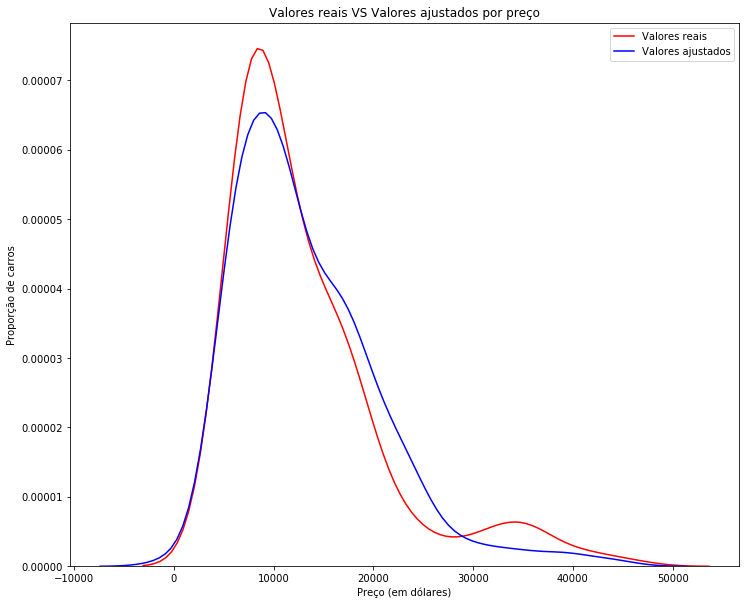

In [272]:
width = 12
height = 10
pyp.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Valores reais")
sns.distplot(Ypred, hist=False, color="b", label="Valores ajustados" , ax=ax1)


pyp.title('Valores reais VS Valores ajustados por preço')
pyp.xlabel('Preço (em dólares)')
pyp.ylabel('Proporção de carros')

pyp.show()
pyp.close()

#  Podemos ver que os valores ajustados estão razoavelmente próximos dos valores reais, uma vez que as duas 
#distribuições se sobrepõem ligeiramente. No entanto, ainda há algum espaço para melhorias.

<ul><ul><p><h3>Medidas para avaliação dentro da amostra</h3>
<p><p> Ao avaliar nossos modelos, queremos não apenas visualizar os resultados, mas também uma medida quantitativa para determinar a precisão do modelo. </p>

<p> Duas medidas muito importantes que são frequentemente usadas em estatistíca para determinar a precisão de um modelo são: </p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared / R-quadrado</b>

<p>R-quadrado, também conhecido como coeficiente de determinação, é uma medida para indicar quão próximos os dados estão da linha de regressão ajustada
.</p>
    
<p>O valor do R-quadrado é a porcentagem de variação da variável de resposta (y) que é explicada por um modelo linear.</p> Quanto MAIOR for o valor do R-quadrado, melhor é o ajuste para os dados.



<b>Mean Squared Error-MSE / Erro médio quadrático</b>

<p>O erro médio quadrático mede a média dos quadrados dos erros, ou seja, a diferença entre o valor real (y) e o valor estimado
 (ŷ). Quanto MENOR for o valor do Erro médio quadrático, melhor é o ajuste para os dados.</p>

In [205]:
# Vamos calcular o R^2 do nosso modelo de regressão linear múltipla 
print('O R-quadrado é: ', lm.score(Z, df['price']))

O R-quadrado é:  0.811811561534475


<ul><ul>Podemos dizer que ~ 81,181% da variação de preço é explicada por essa regressão linear múltipla

In [206]:
# Vamos calcular o MSE
print('O erro médio quadrátivo de price e o valor previsto usando Ypred é: ', \
      mean_squared_error(df['price'], Ypred))

O erro médio quadrátivo de price e o valor previsto usando Ypred é:  11826072.956532085


<h1>7. Refinamento e Validação de modelos </h1>

O modelo foi criado e foram realizadas as previsões de preços de veículos. Agora, vamos determinar a precisão dessas previsões.
<ul><ul><h2>Treinamento e testes </h2>

<p> Uma etapa importante no teste do seu modelo é dividir seus dados em dados de treinamento e teste. Colocaremos os dados alvo <b> preço </b> em um dataframe separado <b> y </b>: </p>

In [239]:
y_data = df['price']
x_data = Z

In [241]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)
#O parâmetro test_size define a proporção de dados que são divididos no conjunto de testes. 
# Nesse caso, é definido como 15% do conjunto de dados total.
print("Número de amostra de teste:", x_test.shape[0])
print("Número de amostras de treinamento:",x_train.shape[0])

Número de amostra de teste: 31
Número de amostras de treinamento: 170


In [242]:
# Criar um novo objeto de regressão linear:
lm2 = LinearRegression()

In [244]:
# Ajustar o modelo usando os 4 melhores recursos (Z)
lm2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [245]:
# Calcular o R-quadrado nos dados de teste:
lm2.score(x_test, y_test)

0.8228513540958031

In [246]:
# Calcular o R-quadrado nos dados de treinamento:
lm2.score(x_train, y_train)

0.8087534748088823

In [247]:
# Previsão usando dados de treinamento:
ypred_train = lm2.predict(x_train)
ypred_train[0:5]

array([12077.45276646, 11552.05055937,  6529.10191302, 21693.09953681,
       16208.09189763])

In [248]:
# Previsão usando dados de teste:
ypred_test = lm2.predict(x_test)
ypred_test[0:5]

array([11076.33081952,  5885.37353698, 11295.89164789,  6891.58097338,
       15340.09329174])

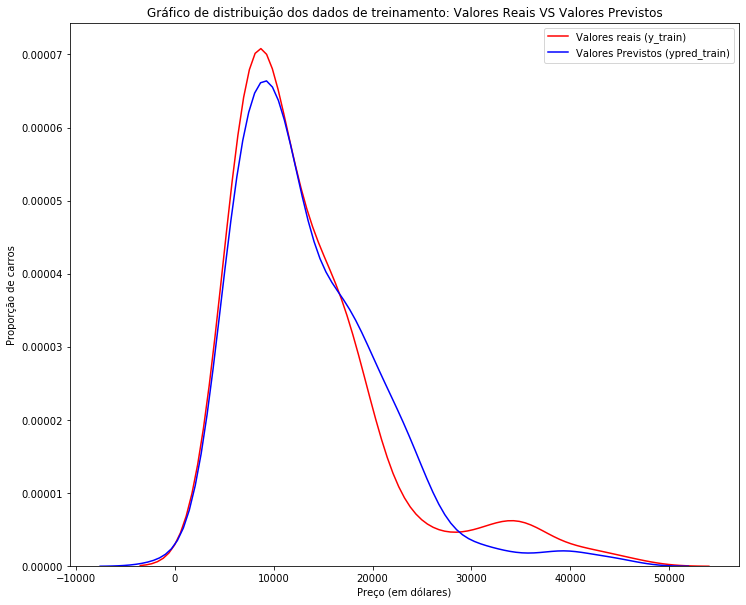

In [270]:
# Vamos realizar alguma avaliação do modelo usando nossos dados de treinamento e teste separadamente

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    pyp.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    pyp.title(Title)
    pyp.xlabel('Preço (em dólares)')
    pyp.ylabel('Proporção de carros')

    pyp.show()
    pyp.close()
    
Title = 'Gráfico de distribuição dos dados de treinamento: Valores Reais VS Valores Previstos'
DistributionPlot(y_train, ypred_train, "Valores reais (y_train)", "Valores Previstos (ypred_train)", Title)

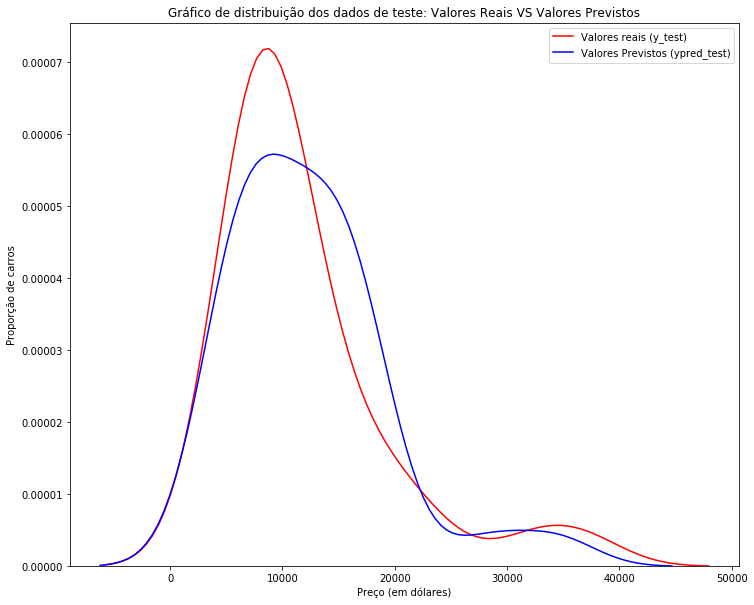

In [271]:
Title='Gráfico de distribuição dos dados de teste: Valores Reais VS Valores Previstos'
DistributionPlot(y_test, ypred_test,"Valores reais (y_test)","Valores Previstos (ypred_test)",Title)

<ul><ul><h2>Cross-validation Score</h2>
    <p>
    Uma vez que terminamos de treinar nosso modelo, simplesmente não podemos assumir que ele funcionará bem em dados que não havia visto antes. Em outras palavras, não podemos ter certeza de que o modelo terá a precisão e a variação desejadas no ambiente de produção.
    <p>A <b>validação cruzada (CV)</b> é uma das técnicas usadas para testar a eficácia de modelos de aprendizado de máquina; também é um procedimento de re-amostragem usado para avaliar um modelo se tivermos dados limitados.
    
    Obs.: Não é necessário aplicar o método de ajuste separadamente enquanto estiver usando a validação cruzada, o método cross_val_score ajusta os próprios dados ao implementar a validação cruzada nos dados.

In [326]:
# Instanciar o objeto, o recurso x_data, os dados de destino (y_data) e o parâmetro 'cv' que determina o número de dobras
# Retorna a pontuação de cada dobra de teste
Rcross = cross_val_score(lm2, x_data, y_data, cv=5)
# A pontuação padrão é R-quadrado; cada elemento na matriz tem o valor médio de R-quadrado na dobra:
Rcross

array([0.78097164, 0.84985413, 0.16768044, 0.55618381, 0.33960077])

In [327]:
# Calcular a média e o desvio padrão dessa estimativa
print("A média das dobras é", Rcross.mean(), ", o desvio padrão é" , Rcross.std(), "e a acurácia do modelo é", Rcross.mean()*100 )

A média das dobras é 0.5388581580397576 , o desvio padrão é 0.2581139336208047 e a acurácia do modelo é 53.88581580397576


In [328]:
# Usar a função 'cross_val_predict' para prever a saída
# A função divide os dados no número especificado de dobras, usando uma dobra para obter uma previsão 
# enquanto o restante das dobras é usado como dados de teste
ycross_pred = cross_val_predict(lm2, x_data, y_data,cv=5)
ycross_pred

array([13526.73475103, 13526.73475103, 17915.10565469, 10300.20800873,
       16122.36117012, 14138.7508615 , 15466.76247604, 15900.23807722,
       18012.24720309, 10537.05295375, 10537.05295375, 17124.54754527,
       17341.28534586, 18937.61323843, 25808.26537652, 26399.36846904,
       27372.96954046,  -205.69128544,  4846.86027425,  4984.78432917,
        4911.91311118,  5115.68076603,  8575.5714224 ,  5474.28330882,
        5560.97842906,  5560.97842906,  8823.83472126, 11705.1773162 ,
       18251.69346387,  3497.65119771,  5306.39655703,  3544.22883135,
        6110.84614377,  6173.8971403 ,  6386.69425361,  6441.86387558,
        9160.41231591,  9369.26874194,  9428.37905119,  9696.34578647,
       11107.04953995, 10778.49192389,  9237.0901007 , 11915.59946698,
       31390.08443486, 31390.08443486, 41990.79635626,  5823.21858684,
        5900.6953479 ,  5916.25849336,  6040.76365704,  6056.3268025 ,
        8527.47870367,  8527.47870367,  8543.04184913, 12193.24307008,
      

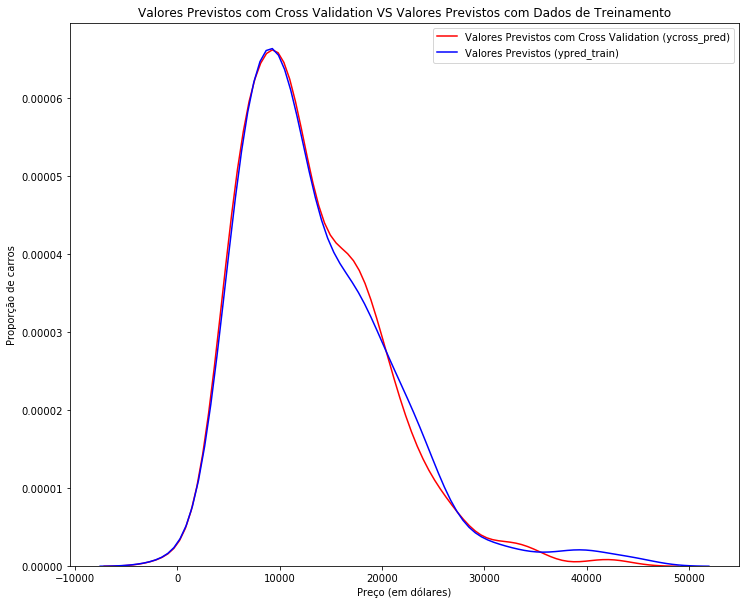

In [329]:
Title = 'Valores Previstos com Cross Validation VS Valores Previstos com Dados de Treinamento'
DistributionPlot(ycross_pred, ypred_train, "Valores Previstos com Cross Validation (ycross_pred)", "Valores Previstos (ypred_train)", Title)